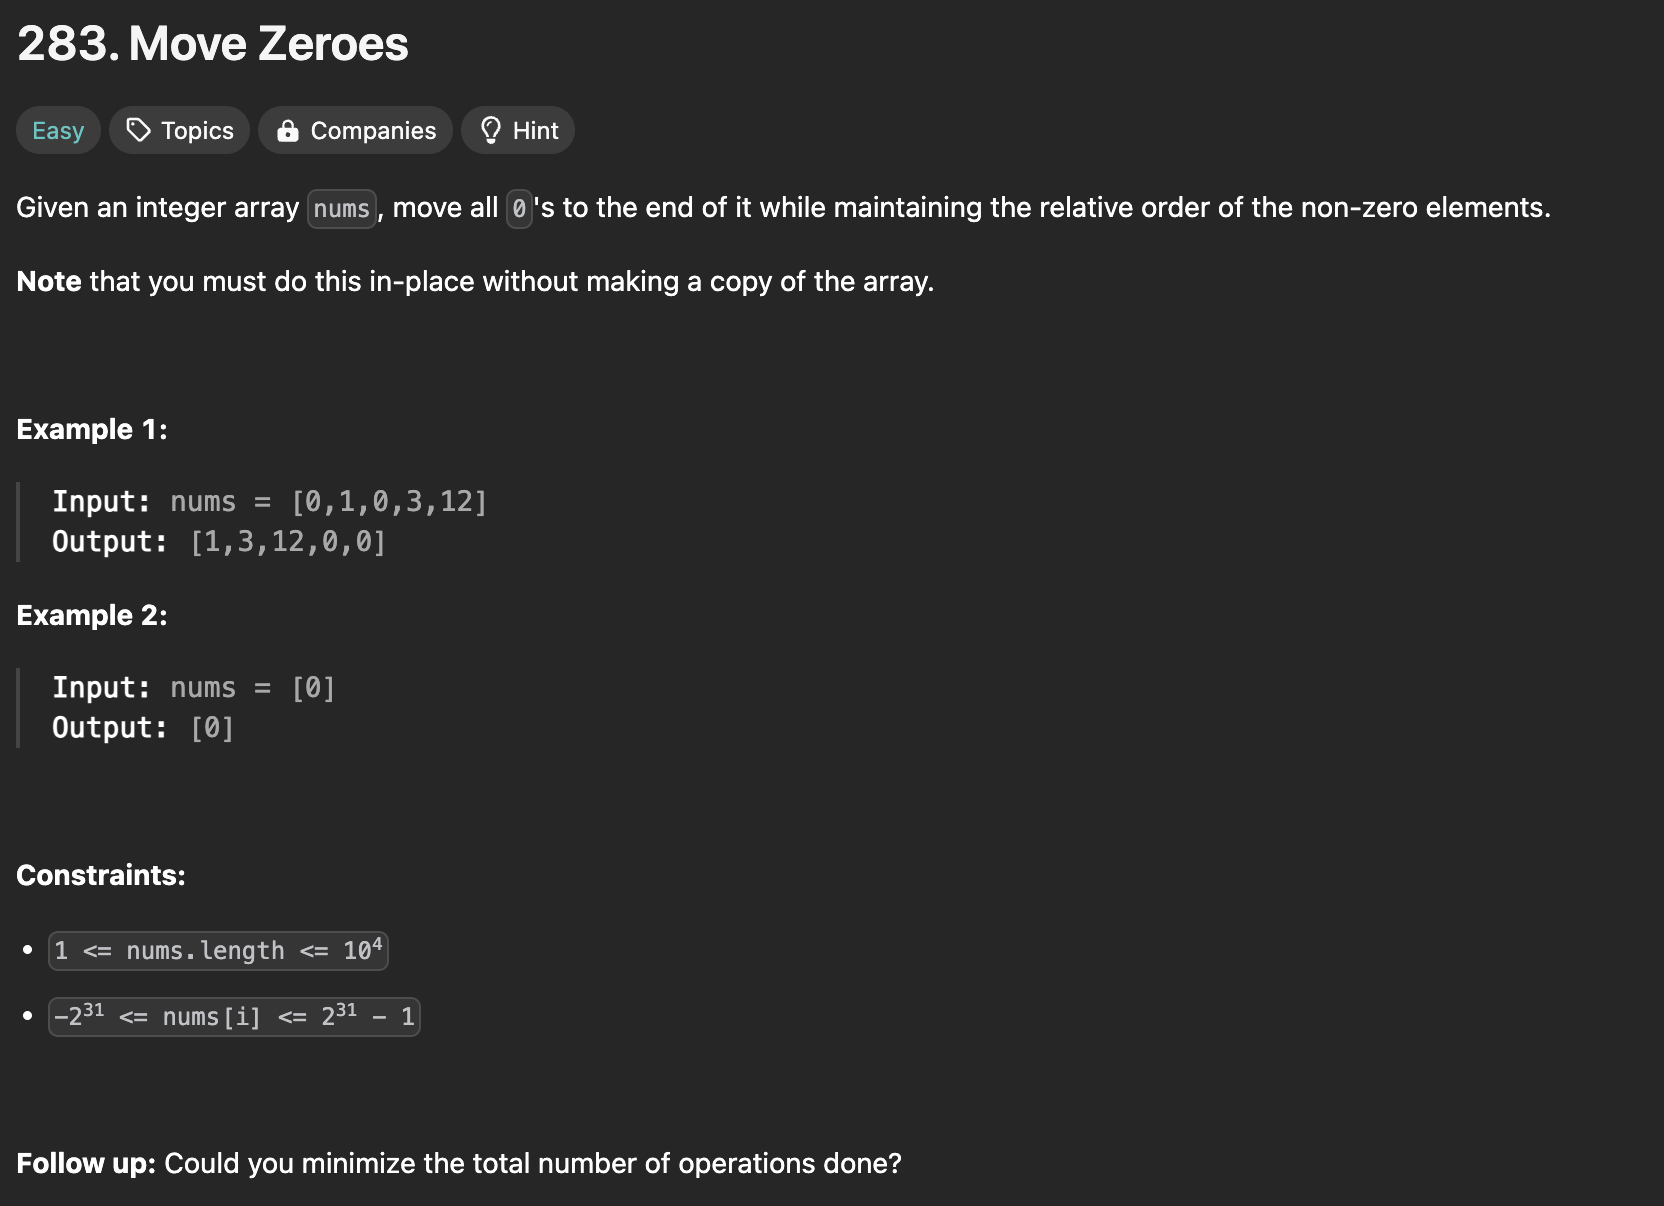

### My plan - 2 pointers approach  

1. Initiate the code with one pointer at the last element and one at the first.
2. Find the next need swap pair - need swap pair is (end pointer points to something thats != 0 and start pointer points to 0)
2.1 To find this state: move the first pointer one step forward util he points at a 0, move the end pointer one step backwards until he points to and none 0 number.
3. Swap start and end pointers value.
4. If end-pointer < start- pointer we are done 

complexity O(n) - space o(n) (just the array)

In [46]:

from typing import List


def moveZeroes(nums: List[int]) -> None:
    start_pointer=0;
    end_pointer=nums.__len__()-1;

    while(start_pointer<end_pointer):

        swap_start = nums[start_pointer] == 0
        swap_end = nums[end_pointer] != 0

        if(swap_start and swap_end):
           temp = nums[start_pointer];
           nums[start_pointer] = nums[end_pointer];
           nums[end_pointer] = temp

        start_pointer = start_pointer if swap_start else start_pointer+1;
        end_pointer = end_pointer if swap_end else end_pointer-1;

   
        

    print(nums)    

    

In [47]:
moveZeroes([0,1,0,3,12])
moveZeroes([0])

[12, 1, 3, 0, 0]
[0]


### results analysis 
* code works fine but dose not keep the items in order: for  [0,1,0,3,12] -> output should be : [1,3,12,0,0] not [12,1,3]

#### problem:
* Swapping the numbers from the start end the end swaps changes the list order.

#### new solution approach:
* Starting from the end and moving towards the beginning.
* Instead of start and end pointers we will call them zero and none_zero pointers.
* Both would start at the end of the list. - Zero pointer would decrease until he is pointing on a number, the none_zero pointer would decrease while he is pointing to a number

In [48]:
def moveZeroes(nums: List[int]) -> None:
    zero_pointer=nums.__len__()-1;
    none_zero_pointer=nums.__len__()-1;

    while(zero_pointer>=0 and none_zero_pointer>=0):

        swap_zero = nums[zero_pointer] == 0
        swap_none_zero = nums[none_zero_pointer] != 0

        if(swap_zero and swap_none_zero):
           print(f'array is {nums}, zero_pointer {zero_pointer}, none_zero_pointer {none_zero_pointer}');
           print(f'swapping {nums[zero_pointer]}, and {nums[none_zero_pointer]}')
           temp = nums[zero_pointer];
           nums[zero_pointer] = nums[none_zero_pointer];
           nums[none_zero_pointer] = temp

        zero_pointer = zero_pointer if swap_zero else zero_pointer-1;
        none_zero_pointer = none_zero_pointer if swap_none_zero else none_zero_pointer-1;

   
        

    print(nums)   

In [49]:
moveZeroes([0,1,0,3,12])
# moveZeroes([0])

array is [0, 1, 0, 3, 12], zero_pointer 2, none_zero_pointer 4
swapping 0, and 12
array is [0, 1, 12, 3, 0], zero_pointer 0, none_zero_pointer 3
swapping 0, and 3
[3, 1, 12, 0, 0]


### results analysis 
* code works fine but dose not keep the items in order: for  [0,1,0,3,12] -> output should be : [3, 1, 12,0,0] not [12,1,3,0,0]

#### problem:
* When swapping the zeroes directly to "the final" position for them we are indirectly changing the rest of the numbers in the lst order.

#### new solution approach:
* focus on maintaining the numbers order. 

two possible solutions:
1. pointer focus: find the first zero, then find the next number after that and swap them. then continue from the original zero index until we reach the end 
2. new empty list approach: create a new list (fill with 0), go over the first list end for every none zero number, add it to the new list

In [52]:
def moveZeroesPointers(nums: List[int]) -> None:
    first_zero_pointer=0;
    next_number_pointer=0;
    last_index = nums.__len__()-1;

    while(first_zero_pointer!= last_index and next_number_pointer != last_index):

        while(nums[first_zero_pointer] != 0 and first_zero_pointer < last_index ):
            first_zero_pointer+=1

        if (first_zero_pointer >= last_index):
            print(nums)
            break


        next_number_pointer = first_zero_pointer + 1
        while (nums[next_number_pointer] == 0 and next_number_pointer < last_index ):
            next_number_pointer+=1

        if (next_number_pointer > last_index):
            print(nums)
            break

        print(f'array is {nums}, next_number_pointer {next_number_pointer}, first_zero_pointer {first_zero_pointer}');
        print(f'swapping {nums[next_number_pointer]}, and {nums[first_zero_pointer]}')

        temp = nums[first_zero_pointer];
        nums[first_zero_pointer] = nums[next_number_pointer];
        nums[next_number_pointer] = temp; 
        

 
    print(nums)   

In [59]:
moveZeroes([0,1,0,3,12])

array is [0, 1, 0, 3, 12], zero_pointer 2, none_zero_pointer 4
swapping 0, and 12
array is [0, 1, 12, 3, 0], zero_pointer 0, none_zero_pointer 3
swapping 0, and 3
[3, 1, 12, 0, 0]


In [57]:
def moveZeroesNewList(nums: List[int]) -> None:
    newList = [];
    zeroCount = 0;

    for number in nums:
        if (number != 0):
            newList.append(number);
        else:
           zeroCount+=1;    

    while (zeroCount != 0):
        newList.append(0)
        zeroCount -=1;

    print(newList)

In [58]:
moveZeroesNewList([0,1,0,3,12])

[1, 3, 12, 0, 0]
